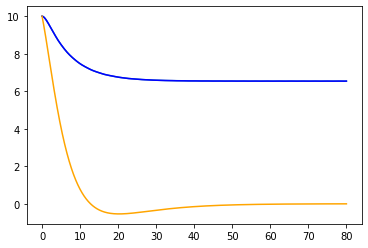

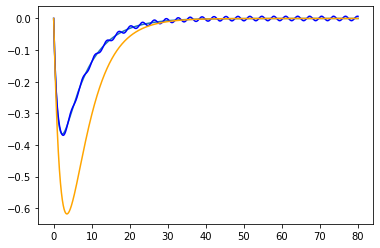

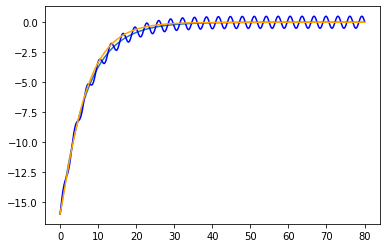

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

def firstSDE(t, x):
  r = 1
  j = 2
  b = 1
  l = 8
  k1 = 5
  k2 = 1/16
  a = -8
  b = 2
  d = math.pi/4
  x1 = x[1]
  x2 = (-1)*x[1]*b/j + k2*x[2]/j
  x3 = (-1)*k1*x[1]/l - r*x[2]/l 
  return x1, x2, x3

def secondSDE(t, x):
  r = 1
  j = 2
  b = 1
  l = 8
  k1 = 5
  k2 = 1/16
  a = -8
  b = 2
  d = math.pi/4
  x1 = x[1]
  x2 = (-1)*x[1]*b/j + k2*x[2]/j
  x3 = (-1)*k1*x[1]/l - r*x[2]/l + a/l*math.sin(b*(t-d))
  return x1, x2, x3

def thirdSDE(t,x):
  r = 1
  j = 2
  b = 1
  l = 8
  k1 = 5
  k2 = 1/16
  a = -0.1
  с = 0.01
  d = math.pi/4
  x1 = a*x[0]+x[1]
  x2 = (-1)*x[1]*b/j + k2*x[2]/j
  x3 = (-1)*k1*x[1]/l - x[2]*(r/l-с) 
  return x1, x2, x3


T = 0
X = [10, 0, -16]
h = 1/1000

t_points = [T]
x1_points = [X[0]]
x2_points = [X[1]]
x3_points = [X[2]]

def addseq(a, b):
  res = []
  for i in range(len(a)):
    res.append(a[i] + b[i])
  return res


while T < 80:
  k1 = firstSDE(T,X)
  k2 = firstSDE(T+h/2, addseq(X, [k1[0] * h/2, k1[1] * h/2, k1[2] * h/2]))
  k3 = firstSDE(T+h/2, addseq(X, [k2[0] * h/2, k2[1] * h/2, k2[2] * h/2]))
  k4 = firstSDE(T+h, addseq(X, [k3[0] * h, k3[1] * h, k3[2] * h]))
  X[0] += h/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
  X[1] += h/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
  X[2] += h/6*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
  T += h
  t_points.append(T)
  x1_points.append(X[0])
  x2_points.append(X[1])
  x3_points.append(X[2])


T = 0
X = [10, 0, -16]

t_point = [T]
x1_point = [X[0]]
x2_point = [X[1]]
x3_point = [X[2]]


while T < 80:
  k1 = secondSDE(T,X)
  k2 = secondSDE(T+h/2, addseq(X, [k1[0] * h/2, k1[1] * h/2, k1[2] * h/2]))
  k3 = secondSDE(T+h/2, addseq(X, [k2[0] * h/2, k2[1] * h/2, k2[2] * h/2]))
  k4 = secondSDE(T+h, addseq(X, [k3[0] * h, k3[1] * h, k3[2] * h]))
  X[0] += h/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
  X[1] += h/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
  X[2] += h/6*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
  T += h
  t_point.append(T)
  x1_point.append(X[0])
  x2_point.append(X[1])
  x3_point.append(X[2])

T = 0
X = [10, 0, -16]

t_Point = [T]
x1_Point = [X[0]]
x2_Point = [X[1]]
x3_Point = [X[2]]


while T < 80:
  k1 = thirdSDE(T,X)
  k2 = thirdSDE(T+h/2, addseq(X, [k1[0] * h/2, k1[1] * h/2, k1[2] * h/2]))
  k3 = thirdSDE(T+h/2, addseq(X, [k2[0] * h/2, k2[1] * h/2, k2[2] * h/2]))
  k4 = thirdSDE(T+h, addseq(X, [k3[0] * h, k3[1] * h, k3[2] * h]))
  X[0] += h/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
  X[1] += h/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
  X[2] += h/6*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
  T += h
  t_Point.append(T)
  x1_Point.append(X[0])
  x2_Point.append(X[1])
  x3_Point.append(X[2])

plt.plot(t_points, x1_points)
plt.plot(t_point, x1_point, c="blue")
plt.plot(t_Point, x1_Point, c="orange")
plt.show()

plt.plot(t_points, x2_points)
plt.plot(t_point, x2_point, c="blue")
plt.plot(t_Point, x2_Point, c="orange")
plt.show()

plt.plot(t_points, x3_points)
plt.plot(t_point, x3_point, c="blue")
plt.plot(t_Point, x3_Point, c="orange")
plt.show()